In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [3]:
def tanh(x):
    return math.tanh(x)

In [7]:
def lstm_predict(x):
    Wf, Whf, bf = 0.5, 0.1, 0
    Wi, Whi, bi = 0.6, 0.2, 0
    Wc, Whc, bc = 0.7, 0.3, 0
    Wo, Who, bo = 0.8, 0.4, 0
    
    h, C = 0, 0
    losses = []
    
    for t in range(len(x)):
        xt = x[t]
        
        ft = sigmoid(Wf * xt + Whf * h + bf)
        it = sigmoid(Wi * xt + Whi * h + bi)
        C_candidate = tanh(Wc * xt + Whc * h + bc)
        C = ft * C + it * C_candidate
        ot = sigmoid(Wo * xt + Who * h + bo)
        h = ot * tanh(C)
        
        loss = (h - xt) ** 2
        losses.append(loss)
        
        print(f"Time Step {t+1}: ft={ft:.4f}, it={it:.4f}, C_candidate={C_candidate:.4f}, C={C:.4f}, ot={ot:.4f}, h={h:.4f}, loss={loss:.4f}")
    
    predicted_value = x[-1] + (x[-1] - x[-2])
    print(f"Predicted next value: {predicted_value:.4f}")
    
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-')
    plt.xlabel('Time Step')
    plt.ylabel('Loss')
    plt.title('Loss over Time Steps')
    plt.show()
    
    return predicted_value

Time Step 1: ft=0.6225, it=0.6457, C_candidate=0.6044, C=0.3902, ot=0.6900, h=0.2564, loss=0.5530
Time Step 2: ft=0.7361, it=0.7775, C_candidate=0.9009, C=0.9877, ot=0.8459, h=0.6398, loss=1.8502
Time Step 3: ft=0.8269, it=0.8730, C_candidate=0.9798, C=1.6721, ot=0.9344, h=0.8707, loss=4.5340
Predicted next value: 4.0000


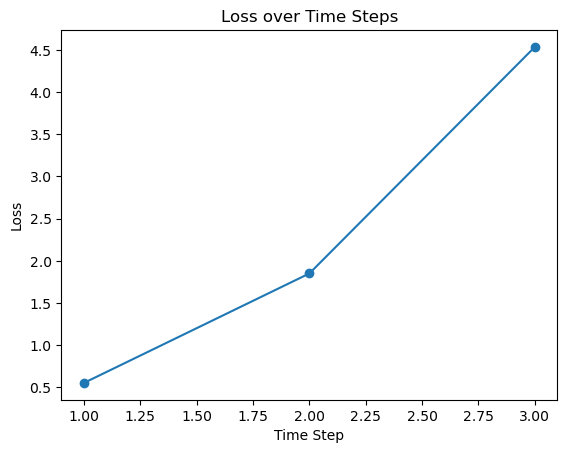

In [8]:
x = [1, 2, 3]
next_value = lstm_predict(x)